In [1]:
# The code was removed by Watson Studio for sharing.

# 1. Import Libraries 

In [55]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [3]:
geopy = project.get_file('geopy-2.0.0.tar.gz')

# Install and import the library
!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

In [4]:
Folium = project.get_file('folium-0.11.0.tar.gz')

!pip install Folium 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# 2. Cleaning Data and Creating Dataframe

### Files with data from Office of Student and Higher Education Statistics Agency have been uploaded to IBM Cloud and imported from the same cloud.

In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
body = client_5ddcad3c526c405bbe4b11b6ecf2ccf4.get_object(Bucket='ibmdatasciencecapstone-donotdelete-pr-pgdieazecmifxu',Key='dt051-table-1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
# Dataframe with number of students. 
# Skipped the first 15 row which contain addtional details about the table.  
uni_students = pd.read_csv(body, header=15)
uni_students

,UKPRN,HE provider,Female,Male,Other,Total
0,10007783.0,The University of Aberdeen,"8,640","6,135",0,"14,775"
1,10007849.0,University of Abertay Dundee,"2,135","2,215",5,"4,355"
2,10007856.0,Aberystwyth University,"4,230","3,585",30,"7,845"
3,10000163.0,AECC University College,300,300,0,595
4,10000291.0,Anglia Ruskin University,"15,615","8,855",25,"24,490"
5,10007759.0,Aston University,"7,135","7,850",0,"14,990"
6,10007857.0,Bangor University,"6,095","4,095",0,"10,195"
7,10000571.0,Bath Spa University,"5,360","2,405",0,"7,770"
8,10007850.0,The University of Bath,"8,540","9,515",10,"18,065"
9,10007152.0,University of Bedfordshire,"8,410","5,515",0,"13,925"


In [7]:
body = client_5ddcad3c526c405bbe4b11b6ecf2ccf4.get_object(Bucket='ibmdatasciencecapstone-donotdelete-pr-pgdieazecmifxu',Key='OfSRegisterData-2020-07-03-0147.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Dataframe with institution 's addresses. 
# Skipped the first 15 row which contain addtional details about the table. 
uni_address = pd.read_excel(body, header=4)
uni_address


,Unnamed: 0,Provider’s legal name,Provider’s trading name(s),Unnamed: 3,Provider’s UKPRN,Provider’s contact address,Provider’s email address,Provider's website,Is the provider an exempt or registered charity?,Category in which the provider is registered,General ongoing conditions of registration that have been disapplied,Is an access and participation plan in place for 2019-20?,Link to the 2019-20 access and participation plan,Is an access and participation plan in place for 2020-21?,Link to the 2020-21 access and participation plan,Link to the access and participation statement,Fee limits that apply to the provider,Current TEF Rating,Highest level of degree awarding powers held,Date of award of these degree awarding powers,Does the provider deliver validated provision on behalf of another provider?,Does the provider deliver sub-contracted provision on behalf of another provider?,Does the provider have the right to use ‘university’ in its title?,Date that use of 'university' was granted,How did the provider gain the right to use 'university' in its title?,1. Specific condition of registration imposed (A1/A2),2. Specific condition of registration imposed (A1/A2),3. Specific condition of registration imposed (A1/A2),1. Specific condition of registration imposed (B1),2. Specific condition of registration imposed (B1),1. Specific condition of registration imposed (B2),2. Specific condition of registration imposed (B2),1. Specific condition of registration imposed (B3),2. Specific condition of registration imposed (B3),1. Specific condition of registration imposed (B4),2. Specific condition of registration imposed (B4),1. Specific condition of registration imposed (B5),2. Specific condition of registration imposed (B5),1. Specific condition of registration imposed (C1),2. Specific condition of registration imposed (C1),1. Specific condition of registration imposed (C3),2. Specific condition of registration imposed (C3),1. Specific condition of registration imposed (D1),2. Specific condition of registration imposed (D1),1. Specific condition of registration imposed (E1),2. Specific condition of registration imposed (E1),1. Specific condition of registration imposed (E2),2. Specific condition of registration imposed (E2),1. Specific condition of registration imposed (E3),2. Specific condition of registration imposed (E3),1. Specific condition of registration imposed (F3),2. Specific condition of registration imposed (F3),1. Specific condition of registration imposed (G1),2. Specific condition of registration imposed (G1),1. Specific condition of registration imposed (Z1),2. Specific condition of registration imposed (Z1),1. Specific condition of registration imposed (Z2),2. Specific condition of registration imposed (Z2)
0,NaN,Lamda Limited,NaN,NaN,10003758.0,155 Talgarth Road\nLondon\nW14 9DA\nUnited Kin...,enquiries@lamda.ac.uk,https://www.lamda.ac.uk,Registered,Approved (fee cap),Not applicable,Yes,https://www.lamda.ac.uk/about-lamda/policies-a...,Yes,https://www.lamda.ac.uk/about-lamda/policies-a...,Not applicable,Higher,Gold,Not applicable,Not applicable,Yes,No,No,Not applicable,Not applicable,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NaN,The University of Surrey,NaN,NaN,10007160.0,Guildford\nSurrey\nGU2 7XH\nUnited Kingdom,NaN,https://www.surrey.ac.uk,Exempt,Approved (fee cap),Not applicable,Yes,https://www.surrey.ac.uk/about/governance/acce...,Yes,https://www.surrey.ac.uk/sites/default/files/2...,Not applicable,Higher,Gold,Research,1966,No,No,Yes,1966,Royal Charter,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,NaN,University of York,NaN,NaN,10007167.0,Heslington\nYork\nYO10 5DD\nUnited Kingdom,admissions@york.ac.uk,https://www.york.ac.uk,Exempt,Approved (fee cap),Not applicable,Yes,htt

### Cleaning uni_address dataframe

In [8]:
#extracting needed information
uni_address = uni_address[['Provider’s legal name','Provider’s contact address']]

print(uni_address.shape)
uni_address.head()

(479, 2)


,Provider’s legal name,Provider’s contact address
0,Lamda Limited,155 Talgarth Road\nLondon\nW14 9DA\nUnited Kin...
1,The University of Surrey,Guildford\nSurrey\nGU2 7XH\nUnited Kingdom
2,University of York,Heslington\nYork\nYO10 5DD\nUnited Kingdom
3,Aston University,Aston Triangle\nBirmingham\nWest Midlands\nB4 ...
4,Royal College of Music,Prince Consort Road\nLondon\nSW7 2BS\nUnited K...


In [9]:
# renaming columns
uni_address.columns = ['Institution','Address']

print(uni_address.shape)
uni_address.head()


(479, 2)


,Institution,Address
0,Lamda Limited,155 Talgarth Road\nLondon\nW14 9DA\nUnited Kin...
1,The University of Surrey,Guildford\nSurrey\nGU2 7XH\nUnited Kingdom
2,University of York,Heslington\nYork\nYO10 5DD\nUnited Kingdom
3,Aston University,Aston Triangle\nBirmingham\nWest Midlands\nB4 ...
4,Royal College of Music,Prince Consort Road\nLondon\nSW7 2BS\nUnited K...


In [10]:
# filter address that include 'London'
uni_London = uni_address[uni_address['Address'].str.contains("London", na=False)]

# reseting index
uni_London = uni_London.reset_index(drop=True)

print(uni_London.shape)
uni_London

(91, 2)


,Institution,Address
0,Lamda Limited,155 Talgarth Road\nLondon\nW14 9DA\nUnited Kin...
1,Royal College of Music,Prince Consort Road\nLondon\nSW7 2BS\nUnited K...
2,The Royal Academy of Music,Marylebone Road\nLondon\nNW1 5HT\nUnited Kingdom
3,The Royal Veterinary College,Royal College Street\nCamden\nLondon\nNW1 0TU\...
4,Queen Mary University of London,327 Mile End Road\nLondon\nE1 4NS\nUnited Kingdom
5,King's College London,Strand\nLondon\nWC2R 2LS\nUnited Kingdom
6,The Royal Central School of Speech and Drama,Embassy Theatre\n62-64 Eton Avenue\nLondon\nNW...
7,Trinity Laban Conservatoire of Music and Dance,King Charles Court\nOld Royal Naval College\nL...
8,"Imperial College of Science, Technology and Me...",Exhibition Road\nLondon\nSW7 2AZ\nUnited Kingdom
9,St. George's Hospital Medical School,St. George's Hospital\nCranmer Terrace\nLondon...


In [11]:
# replacing '\n' with ','
uni_London['Address']= uni_London["Address"].str.replace("\n",",")
uni_London['Institution']= uni_London["Institution"].str.replace("&","and")


print(uni_London.shape)
uni_London.head()

(91, 2)


,Institution,Address
0,Lamda Limited,"155 Talgarth Road,London,W14 9DA,United Kingdom"
1,Royal College of Music,"Prince Consort Road,London,SW7 2BS,United Kingdom"
2,The Royal Academy of Music,"Marylebone Road,London,NW1 5HT,United Kingdom"
3,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni..."
4,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom"


### Cleaning uni_total dataframe

In [12]:
#extracting needed information
uni_total = uni_students[['HE provider','Total']]
# removing total number of students at these institutions 
uni_total = uni_total.drop(169)

print(uni_total.shape)
uni_total.head()

(169, 2)


,HE provider,Total
0,The University of Aberdeen,"14,775"
1,University of Abertay Dundee,"4,355"
2,Aberystwyth University,"7,845"
3,AECC University College,595
4,Anglia Ruskin University,"24,490"


In [13]:
# renaming columns
uni_total.columns = ['Institution','#ofStudents']


In [14]:
#converting the object number into a intger
uni_total['#ofStudents']= uni_total["#ofStudents"].str.replace(",","").astype(float)

uni_total.head()

,Institution,#ofStudents
0,The University of Aberdeen,14775.0
1,University of Abertay Dundee,4355.0
2,Aberystwyth University,7845.0
3,AECC University College,595.0
4,Anglia Ruskin University,24490.0


In [15]:
# Removing insitutions with a student popluation of less than 2000
uni_1000 = uni_total[uni_total['#ofStudents']>1000]

# reseting index
uni_1000 = uni_1000.reset_index(drop=True)

print(uni_1000.shape)
uni_1000

(153, 2)


,Institution,#ofStudents
0,The University of Aberdeen,14775.0
1,University of Abertay Dundee,4355.0
2,Aberystwyth University,7845.0
3,Anglia Ruskin University,24490.0
4,Aston University,14990.0
5,Bangor University,10195.0
6,Bath Spa University,7770.0
7,The University of Bath,18065.0
8,University of Bedfordshire,13925.0
9,Queen's University Belfast,24695.0


### Merging uni_London and uni_1000 into new dataframe

In [16]:
#merging both dataframes
uni_London_1000 = pd.merge(uni_London, uni_1000)

print(uni_London_1000.shape)
uni_London_1000


(19, 3)


,Institution,Address,#ofStudents
0,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni...",2525.0
1,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0
2,King's College London,"Strand,London,WC2R 2LS,United Kingdom",32895.0
3,The Royal Central School of Speech and Drama,"Embassy Theatre,62-64 Eton Avenue,London,NW3 3...",1055.0
4,Trinity Laban Conservatoire of Music and Dance,"King Charles Court,Old Royal Naval College,Lon...",1195.0
5,"Imperial College of Science, Technology and Me...","Exhibition Road,London,SW7 2AZ,United Kingdom",19115.0
6,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",41180.0
7,"City, University of London","Northampton Square,London,EC1V 0HB,United Kingdom",20210.0
8,London South Bank University,"103 Borough Road,London,SE1 0AA,United Kingdom",17125.0
9,London Business School,"Regent's Park,London,NW1 4SA,United Kingdom",2075.0


### Retrieving Coordinates for universities

In [17]:
# function to delay between geocoding calls
geocode = RateLimiter(Nominatim(user_agent="meow").geocode, min_delay_seconds=3)
# create location column
uni_London_1000['location'] = uni_London_1000['Address'].apply(geocode)
# create longitude, laatitude and altitude from location column (returns tuple)
uni_London_1000['point'] = uni_London_1000['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# split point column into latitude, longitude and altitude columns
uni_London_1000[['latitude', 'longitude', 'altitude']] = pd.DataFrame(uni_London_1000['point'].tolist(), index=uni_London_1000.index)


In [18]:
uni_London_1000


,Institution,Address,#ofStudents,location,point,latitude,longitude,altitude
0,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni...",2525.0,"(Royal College Street, Somers Town, London Bor...","(51.5365648, -0.1340119, 0.0)",51.536565,-0.134012,0.0
1,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0,"(Mile End Road, Globe Town, Mile End, London B...","(51.5226844, -0.040864, 0.0)",51.522684,-0.040864,0.0
2,King's College London,"Strand,London,WC2R 2LS,United Kingdom",32895.0,"(Strand, St Clement Danes, Covent Garden, City...","(51.512416, -0.1157884, 0.0)",51.512416,-0.115788,0.0
3,The Royal Central School of Speech and Drama,"Embassy Theatre,62-64 Eton Avenue,London,NW3 3...",1055.0,None,None,NaN,NaN,NaN
4,Trinity Laban Conservatoire of Music and Dance,"King Charles Court,Old Royal Naval College,Lon...",1195.0,None,None,NaN,NaN,NaN
5,"Imperial College of Science, Technology and Me...","Exhibition Road,London,SW7 2AZ,United Kingdom",19115.0,"(Exhibition Road, Brompton, Royal Borough of K...","(51.4981678, -0.174107, 0.0)",51.498168,-0.174107,0.0
6,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",41180.0,"(Gower Street, St Giles, Somers Town, London B...","(51.5242348, -0.134564, 0.0)",51.524235,-0.134564,0.0
7,"City, University of London","Northampton Square,London,EC1V 0HB,United Kingdom",20210.0,"(Northampton Square, Clerkenwell Green, Clerke...","(51.5274657, -0.1018042, 0.0)",51.527466,-0.101804,0.0
8,London South Bank University,"103 Borough Road,London,SE1 0AA,United Kingdom",17125.0,"(Borough Road, Bankside, Elephant and Castle, ...","(51.4988147, -0.1030119, 0.0)",51.498815,-0.103012,0.0
9,London Business School,"Regent's Park,London,NW1 4SA,United Kingdom",2075.0,"(The Regent's Park, Maitland Park, Marylebone,...","(51.53023185, -0.15393249943541745, 0.0)",51.530232,-0.153932,0.0


In [19]:
uni_final = uni_London_1000.copy()

print(uni_final.shape)
uni_final.head()


(19, 8)


,Institution,Address,#ofStudents,location,point,latitude,longitude,altitude
0,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni...",2525.0,"(Royal College Street, Somers Town, London Bor...","(51.5365648, -0.1340119, 0.0)",51.536565,-0.134012,0.0
1,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0,"(Mile End Road, Globe Town, Mile End, London B...","(51.5226844, -0.040864, 0.0)",51.522684,-0.040864,0.0
2,King's College London,"Strand,London,WC2R 2LS,United Kingdom",32895.0,"(Strand, St Clement Danes, Covent Garden, City...","(51.512416, -0.1157884, 0.0)",51.512416,-0.115788,0.0
3,The Royal Central School of Speech and Drama,"Embassy Theatre,62-64 Eton Avenue,London,NW3 3...",1055.0,None,None,NaN,NaN,NaN
4,Trinity Laban Conservatoire of Music and Dance,"King Charles Court,Old Royal Naval College,Lon...",1195.0,None,None,NaN,NaN,NaN


In [20]:
# remove locations without coordinates
uni_final = uni_final.dropna()

# reseting index
uni_final = uni_final.reset_index(drop=True)

print(uni_final.shape)
uni_final


(15, 8)


,Institution,Address,#ofStudents,location,point,latitude,longitude,altitude
0,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni...",2525.0,"(Royal College Street, Somers Town, London Bor...","(51.5365648, -0.1340119, 0.0)",51.536565,-0.134012,0.0
1,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0,"(Mile End Road, Globe Town, Mile End, London B...","(51.5226844, -0.040864, 0.0)",51.522684,-0.040864,0.0
2,King's College London,"Strand,London,WC2R 2LS,United Kingdom",32895.0,"(Strand, St Clement Danes, Covent Garden, City...","(51.512416, -0.1157884, 0.0)",51.512416,-0.115788,0.0
3,"Imperial College of Science, Technology and Me...","Exhibition Road,London,SW7 2AZ,United Kingdom",19115.0,"(Exhibition Road, Brompton, Royal Borough of K...","(51.4981678, -0.174107, 0.0)",51.498168,-0.174107,0.0
4,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",41180.0,"(Gower Street, St Giles, Somers Town, London B...","(51.5242348, -0.134564, 0.0)",51.524235,-0.134564,0.0
5,"City, University of London","Northampton Square,London,EC1V 0HB,United Kingdom",20210.0,"(Northampton Square, Clerkenwell Green, Clerke...","(51.5274657, -0.1018042, 0.0)",51.527466,-0.101804,0.0
6,London South Bank University,"103 Borough Road,London,SE1 0AA,United Kingdom",17125.0,"(Borough Road, Bankside, Elephant and Castle, ...","(51.4988147, -0.1030119, 0.0)",51.498815,-0.103012,0.0
7,London Business School,"Regent's Park,London,NW1 4SA,United Kingdom",2075.0,"(The Regent's Park, Maitland Park, Marylebone,...","(51.53023185, -0.15393249943541745, 0.0)",51.530232,-0.153932,0.0
8,Ravensbourne University London,"6 Penrose Way,London,SE10 0EW,United Kingdom",2530.0,"(Ravensbourne University London, Penrose Way, ...","(51.5016671, 0.005737747823098636, 0.0)",51.501667,0.005738,0.0
9,The University of West London,"St Mary's Road,Ealing,London,W5 5RF,United Kin...",11055.0,"(St Mary's Road, West Ealing, Perivale, London...","(51.5075367, -0.3050812, 0.0)",51.507537,-0.305081,0.0


In [21]:
#remove extra columns
uni_final = uni_final.drop(columns=['location', 'point', 'altitude'])

print(uni_final.shape)
uni_final.head(2)


(15, 5)


,Institution,Address,#ofStudents,latitude,longitude
0,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni...",2525.0,51.536565,-0.134012
1,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0,51.522684,-0.040864


### Mapping institutions to map of London

In [22]:
address = 'London'

location = Nominatim().geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of London are 51.5073219, -0.1276474.


In [46]:
# create map of London, with markers of institutions, using latitude and longitude values
map_London = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, institution in zip(uni_final['latitude'], uni_final['longitude'], uni_final['Institution']):
    label = '{}'.format('Institution')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London


### Using Foursquare API to retrive relevent information

In [24]:
CLIENT_ID = '4CUDCLWWIYCCU44Y5ZGMTN0EXZKRJD4GN03LAO4LSJBSTTKI' 
CLIENT_SECRET = 'ZLB3RCIMI1ZWNTEFC4CT0IIAUXXLMP2QBAIINP4WE42EKJUP'
VERSION = '20180605' 

print('Done!')

Done!


In [25]:
#Finding locations with query 'bubble tea'
radius = 800
LIMIT = 200
query = 'bubble tea'

venues = []

for lat, lng, institution, address in zip(uni_final['latitude'], uni_final['longitude'], uni_final['Institution'], uni_final['Address']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        query,
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            institution,
            address,
            venue['venue']['name'], 
            venue['venue']['location']['distance'], 
            venue['venue']['location']['formattedAddress'],  
            venue['venue']['categories'][0]['name']))

In [26]:
# Converting retrived information into a dataframe
bubbletea_London = pd.DataFrame(venues)

# column names
bubbletea_London.columns = ['Institution','Address','Venue', 'Distance', 'Venue Address', 'Category']

print(bubbletea_London.shape)
bubbletea_London

(24, 6)


,Institution,Address,Venue,Distance,Venue Address,Category
0,The Royal Veterinary College,"Royal College Street,Camden,London,NW1 0TU,Uni...",Mooboo,784,"[84 Parkway, Camden Town, Greater London, NW1 ...",Bubble Tea Shop
1,Queen Mary University of London,"327 Mile End Road,London,E1 4NS,United Kingdom",Yi Fang - Taiwan Fruit Tea,427,"[383A Mile End Road, London, Greater London, E...",Bubble Tea Shop
2,"Imperial College of Science, Technology and Me...","Exhibition Road,London,SW7 2AZ,United Kingdom",Bubbleology,411,"[23 Cromwell Pl, Queen's Gate, Greater London,...",Bubble Tea Shop
3,"Imperial College of Science, Technology and Me...","Exhibition Road,London,SW7 2AZ,United Kingdom",Biju Bubble Tea Room,518,"[London, Greater London, SW7 3EY, United Kingdom]",Bubble Tea Shop
4,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",Chatime,715,"[The Brunswick, London, Greater London, WC1N 1...",Bubble Tea Shop
5,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",Bang Bang Canteen,387,"[53 Warren St, London, Greater London, W1T 5NL...",Vietnamese Restaurant
6,"City, University of London","Northampton Square,London,EC1V 0HB,United Kingdom",Bibento,727,"[Whitecross Street Market, United Kingdom]",Bubble Tea Shop
7,"City, University of London","Northampton Square,London,EC1V 0HB,United Kingdom",Tra Garden,748,"[37 Rosebery Avenue, London, Greater London, E...",Bubble Tea Shop
8,London South Bank University,"103 Borough Road,London,SE1 0AA,United Kingdom",Nom Noms Cafe,673,"[97 Newington Butts, London, Greater London, S...",Café
9,Ravensbourne University London,"6 Penrose Way,London,SE10 0EW,United Kingdom",Coco,337,"[SE10 0DX, United Kingdom]",Bubble Tea Shop


In [27]:
#Finding locations with query boba
radius = 800
LIMIT = 200
query = 'boba'

venues = []

for lat, lng, institution, address in zip(uni_final['latitude'], uni_final['longitude'], uni_final['Institution'], uni_final['Address']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        query,
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            institution,
            address,
            venue['venue']['name'], 
            venue['venue']['location']['distance'], 
            venue['venue']['location']['formattedAddress'],  
            venue['venue']['categories'][0]['name']))

In [28]:
# Converting retrived information into a dataframe
boba_London = pd.DataFrame(venues)

# column names
boba_London.columns = ['Institution','Address','Venue', 'Distance', 'Venue Address', 'Category']

print(boba_London.shape)
boba_London

(2, 6)


,Institution,Address,Venue,Distance,Venue Address,Category
0,"Imperial College of Science, Technology and Me...","Exhibition Road,London,SW7 2AZ,United Kingdom",Bubbleology,411,"[23 Cromwell Pl, Queen's Gate, Greater London,...",Bubble Tea Shop
1,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",BobaJam,776,"[80 Dean St, London, Greater London, W1D 3SL, ...",Dessert Shop


### Processing information retrived from Foursquare

In [29]:
#joining boba_London and bubbletea_London to make a complete table
uni_London_bubbletea = bubbletea_London.append(boba_London)

#resort dataframe
uni_London_bubbletea = uni_London_bubbletea.sort_values(['Institution', 'Distance'], ascending=False)

# reseting index
uni_London_bubbletea = uni_London_bubbletea.reset_index(drop=True)

print(uni_London_bubbletea.shape)
uni_London_bubbletea

(26, 6)


,Institution,Address,Venue,Distance,Venue Address,Category
0,"University of the Arts, London","272 High Holborn,London,WC1V 7EY,United Kingdom",CoCo Fresh Tea & Juice,589,"[65 Great Russell St (at Montague St.), London...",Bubble Tea Shop
1,"University of the Arts, London","272 High Holborn,London,WC1V 7EY,United Kingdom",The Alley,28,"[A40 High Holborn, London, Greater London, WC1...",Bubble Tea Shop
2,"University of the Arts, London","272 High Holborn,London,WC1V 7EY,United Kingdom",The Alley 鹿角巷,24,"[Unit 3, 272 High Holborn, London, Greater Lon...",Bubble Tea Shop
3,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",Chatime,715,"[The Brunswick, London, Greater London, WC1N 1...",Bubble Tea Shop
4,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",Bang Bang Canteen,387,"[53 Warren St, London, Greater London, W1T 5NL...",Vietnamese Restaurant
5,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",BobaJam,776,"[80 Dean St, London, Greater London, W1D 3SL, ...",Bubble Tea Shop
6,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",BobaJam,776,"[80 Dean St, London, Greater London, W1D 3SL, ...",Dessert Shop
7,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",Dyce,542,"[27 James St, London, Greater London, W1U 1DX,...",Ice Cream Shop
8,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",Yi Fang Taiwan Fruit Tea,514,[Bond Street London Underground Station (Oxfor...,Bubble Tea Shop
9,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",Bubbleology,213,"[214 Oxford St, London, Greater London, W1W 8L...",Bubble Tea Shop


In [30]:
#removing duplicate in row 17
uni_London_bubbletea = uni_London_bubbletea.drop(17)

# reseting index
uni_London_bubbletea = uni_London_bubbletea.reset_index(drop=True)

print(uni_London_bubbletea.shape)
uni_London_bubbletea


(25, 6)


,Institution,Address,Venue,Distance,Venue Address,Category
0,"University of the Arts, London","272 High Holborn,London,WC1V 7EY,United Kingdom",CoCo Fresh Tea & Juice,589,"[65 Great Russell St (at Montague St.), London...",Bubble Tea Shop
1,"University of the Arts, London","272 High Holborn,London,WC1V 7EY,United Kingdom",The Alley,28,"[A40 High Holborn, London, Greater London, WC1...",Bubble Tea Shop
2,"University of the Arts, London","272 High Holborn,London,WC1V 7EY,United Kingdom",The Alley 鹿角巷,24,"[Unit 3, 272 High Holborn, London, Greater Lon...",Bubble Tea Shop
3,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",Chatime,715,"[The Brunswick, London, Greater London, WC1N 1...",Bubble Tea Shop
4,University College London,"Gower Street,London,WC1E 6BT,United Kingdom",Bang Bang Canteen,387,"[53 Warren St, London, Greater London, W1T 5NL...",Vietnamese Restaurant
5,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",BobaJam,776,"[80 Dean St, London, Greater London, W1D 3SL, ...",Bubble Tea Shop
6,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",BobaJam,776,"[80 Dean St, London, Greater London, W1D 3SL, ...",Dessert Shop
7,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",Dyce,542,"[27 James St, London, Greater London, W1U 1DX,...",Ice Cream Shop
8,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",Yi Fang Taiwan Fruit Tea,514,[Bond Street London Underground Station (Oxfor...,Bubble Tea Shop
9,The University of Westminster,"309 Regent Street,London,W1B 2HW,United Kingdom",Bubbleology,213,"[214 Oxford St, London, Greater London, W1W 8L...",Bubble Tea Shop


In [37]:
#count of bubble tea shop by institution
bubbletea_grouped=uni_London_bubbletea.groupby(["Institution"]).count()

#Venue only
bubbletea_grouped = bubbletea_grouped[['Venue']]

#add index
bubbletea_grouped.reset_index(inplace=True)

print(bubbletea_grouped.shape)
bubbletea_grouped

(11, 2)


,Institution,Venue
0,Birkbeck College,4
1,"City, University of London",2
2,Guildhall School of Music and Drama,2
3,"Imperial College of Science, Technology and Me...",2
4,London South Bank University,1
5,Queen Mary University of London,1
6,Ravensbourne University London,1
7,The Royal Veterinary College,1
8,The University of Westminster,6
9,University College London,2


In [38]:
#what institution did not have any bubble tea store within 800 meters
bubbletea_grouped_final = uni_London_bubbletea.merge(uni_final, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']
bubbletea_grouped_final


,Institution,Address,Venue,Distance,Venue Address,Category,#ofStudents,latitude,longitude,_merge
25,King's College London,"Strand,London,WC2R 2LS,United Kingdom",NaN,NaN,NaN,NaN,32895.0,51.512416,-0.115788,right_only
26,London Business School,"Regent's Park,London,NW1 4SA,United Kingdom",NaN,NaN,NaN,NaN,2075.0,51.530232,-0.153932,right_only
27,The University of West London,"St Mary's Road,Ealing,London,W5 5RF,United Kin...",NaN,NaN,NaN,NaN,11055.0,51.507537,-0.305081,right_only
28,Roehampton University,"Grove House ,Roehampton Lane ,London ,SW15 5PJ...",NaN,NaN,NaN,NaN,12665.0,51.449304,-0.239001,right_only


In [39]:
#Adding 'Venue' column with 0 for no results
bubbletea_grouped_final['Venue'] = [0,0,0,0]

bubbletea_grouped_final = bubbletea_grouped_final.drop(columns=['Address', 'Distance', 'Venue Address','Category','#ofStudents','latitude', 
                                                                'longitude','_merge'])
bubbletea_grouped_final


,Institution,Venue
25,King's College London,0
26,London Business School,0
27,The University of West London,0
28,Roehampton University,0


In [40]:
#joining bubbletea_grouped_final and bubbletea_London to make a complete table
bubbletea_grouped_final = bubbletea_grouped_final.append(bubbletea_grouped)

#resort dataframe
bubbletea_grouped_final = bubbletea_grouped_final.sort_values(['Institution'], ascending=False)

# reseting index
bubbletea_grouped_final = bubbletea_grouped_final.reset_index(drop=True)

print(bubbletea_grouped_final.shape)
bubbletea_grouped_final

(15, 2)


,Institution,Venue
0,"University of the Arts, London",3
1,University College London,2
2,The University of Westminster,6
3,The University of West London,0
4,The Royal Veterinary College,1
5,Roehampton University,0
6,Ravensbourne University London,1
7,Queen Mary University of London,1
8,London South Bank University,1
9,London Business School,0


### Clustering

In [42]:
# set number of clusters
kclusters = 3

kl_clustering = bubbletea_grouped_final.drop(['Institution'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([2, 2, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [43]:
# create a new dataframe that includes the cluster as well as the number of venues for each institution.
bubbletea_merge = bubbletea_grouped_final.copy()

# add clustering labels
bubbletea_merge["Cluster Labels"] = kmeans.labels_

# merge bubbletea_merge with uni_final to add latitude/longitude for each neighborhood
bubbletea_merge = bubbletea_merge.join(uni_final.set_index("Institution"), on="Institution")

print(bubbletea_merge.shape)
bubbletea_merge


(15, 7)


,Institution,Venue,Cluster Labels,Address,#ofStudents,latitude,longitude
0,"University of the Arts, London",3,2,"272 High Holborn,London,WC1V 7EY,United Kingdom",19095.0,51.517679,-0.116403
1,University College London,2,2,"Gower Street,London,WC1E 6BT,United Kingdom",41180.0,51.524235,-0.134564
2,The University of Westminster,6,1,"309 Regent Street,London,W1B 2HW,United Kingdom",18885.0,51.516899,-0.143305
3,The University of West London,0,0,"St Mary's Road,Ealing,London,W5 5RF,United Kin...",11055.0,51.507537,-0.305081
4,The Royal Veterinary College,1,0,"Royal College Street,Camden,London,NW1 0TU,Uni...",2525.0,51.536565,-0.134012
5,Roehampton University,0,0,"Grove House ,Roehampton Lane ,London ,SW15 5PJ...",12665.0,51.449304,-0.239001
6,Ravensbourne University London,1,0,"6 Penrose Way,London,SE10 0EW,United Kingdom",2530.0,51.501667,0.005738
7,Queen Mary University of London,1,0,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0,51.522684,-0.040864
8,London South Bank University,1,0,"103 Borough Road,London,SE1 0AA,United Kingdom",17125.0,51.498815,-0.103012
9,London Business School,0,0,"Regent's Park,London,NW1 4SA,United Kingdom",2075.0,51.530232,-0.153932


### Visualization

In [52]:
# new map
bubbletea_uni_map = folium.Map(location=[latitude, longitude], zoom_start=12)

#color scheme
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, poi, cluster in zip(bubbletea_merge['latitude'], bubbletea_merge['longitude'], bubbletea_merge['Institution'], bubbletea_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bubbletea_uni_map)
       
bubbletea_uni_map

In [57]:
#resort dataframe
bubbletea_merge = bubbletea_merge.sort_values(['#ofStudents'], ascending=False)

# reseting index
bubbletea_merge = bubbletea_merge.reset_index(drop=True)
bubbletea_merge

,Institution,Venue,Cluster Labels,Address,#ofStudents,latitude,longitude
0,University College London,2,2,"Gower Street,London,WC1E 6BT,United Kingdom",41180.0,51.524235,-0.134564
1,King's College London,0,0,"Strand,London,WC2R 2LS,United Kingdom",32895.0,51.512416,-0.115788
2,Queen Mary University of London,1,0,"327 Mile End Road,London,E1 4NS,United Kingdom",20560.0,51.522684,-0.040864
3,"City, University of London",2,2,"Northampton Square,London,EC1V 0HB,United Kingdom",20210.0,51.527466,-0.101804
4,"Imperial College of Science, Technology and Me...",2,2,"Exhibition Road,London,SW7 2AZ,United Kingdom",19115.0,51.498168,-0.174107
5,"University of the Arts, London",3,2,"272 High Holborn,London,WC1V 7EY,United Kingdom",19095.0,51.517679,-0.116403
6,The University of Westminster,6,1,"309 Regent Street,London,W1B 2HW,United Kingdom",18885.0,51.516899,-0.143305
7,London South Bank University,1,0,"103 Borough Road,London,SE1 0AA,United Kingdom",17125.0,51.498815,-0.103012
8,Roehampton University,0,0,"Grove House ,Roehampton Lane ,London ,SW15 5PJ...",12665.0,51.449304,-0.239001
9,Birkbeck College,4,1,"Malet Street,London,WC1E 7HX,United Kingdom",11390.0,51.522234,-0.131178


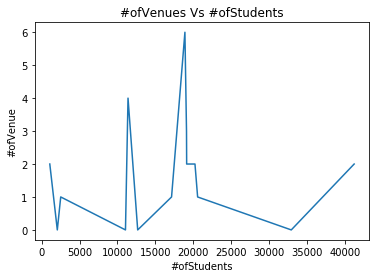

In [58]:
#Line plot to see if there is a possible corratltion between number of students and number of bubble tea venues
Students = bubbletea_merge['#ofStudents']
Venue = bubbletea_merge['Venue']
  
plt.plot(Students, Venue)
plt.title('#ofVenues Vs #ofStudents')
plt.xlabel('#ofStudents')
plt.ylabel('#ofVenue')
plt.show()